# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
#выведу первые 10 строк датафрейма
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


На первый взгляд в данных много NaN.

In [4]:
#посмотрю общюю информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

NaN действительно много.

In [5]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Есть аномальные значения, например, 19 комнат или потолки 100 м.

In [6]:
#посчитаю долю пропущенных значений во всех столбцах
df.isna().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

### Вывод

Много пропущенные значений, есть аномалии, в некоторых столобцах поменяю тип данных. В первую очередь посмотрю столбцы с наибольшим количеством пропусков. Заполню пропуски, где это возможно.

## Предобработка данных

In [7]:
#проверю столбец is_apartment
df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [8]:
#предположу, что пропуски это не апартаменты, и заполню их False
df['is_apartment'] = df['is_apartment'].fillna(False)
df['is_apartment'].head()

0    False
1    False
2    False
3    False
4    False
Name: is_apartment, dtype: bool

Заполнила пропуски и заменила тип данных на bool.

In [9]:
#проверю столбцы parks_nearest и ponds_nearest
df['parks_nearest'].value_counts()

441.0     67
392.0     41
173.0     41
456.0     40
471.0     32
          ..
2489.0     1
786.0      1
793.0      1
92.0       1
929.0      1
Name: parks_nearest, Length: 995, dtype: int64

In [10]:
df['ponds_nearest'].value_counts()

427.0     70
454.0     41
153.0     40
433.0     39
564.0     37
          ..
1075.0     1
74.0       1
1236.0     1
395.0      1
995.0      1
Name: ponds_nearest, Length: 1096, dtype: int64

В этих столбцах оставлю все без изменений, т.к. в дальнейших расчетах эти данные не понадобятся.

In [11]:
#проверю столбец balcony
df['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

In [12]:
#предположу, что пропуски означают, что балконов нет, и заполню их нолями; также заменю тип переменной на целочисленный
df['balcony'] = df['balcony'].fillna(0).astype('int')
df['balcony'].isna().sum()

0

In [13]:
#проверю столбец ceiling_height
df['ceiling_height'].value_counts()

2.50     3515
2.60     1646
2.70     1574
3.00     1112
2.80      993
         ... 
4.25        1
3.39        1
3.93        1
10.30       1
4.65        1
Name: ceiling_height, Length: 183, dtype: int64

In [14]:
#пропуски в столбце ceiling_height заполню медианным значением
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.60,1,False,...,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.30,4,False,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,False,...,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26.0,10.60,6,False,...,14.40,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,NaN,22,False,...,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,False,...,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,False,...,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [15]:
#проверю столбец floors_total
df['floors_total'].value_counts()

5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
37.0       1
34.0       1
33.0       1
60.0       1
29.0       1
52.0       1
Name: floors_total, dtype: int64

In [16]:
#пропуски заменю на значения из floor, предположив, что это последний этаж
#заменю тип данных на int
df['floors_total'] = df['floors_total'].fillna(df['floor']).astype('int')
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16,51.00,8,False,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11,18.60,1,False,...,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5,34.30,4,False,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14,32.00,13,False,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12,14.40,5,False,...,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26,10.60,6,False,...,14.40,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24,NaN,22,False,...,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27,15.43,26,False,...,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9,43.60,7,False,...,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [17]:
df['floors_total'].isna().value_counts()

False    23699
Name: floors_total, dtype: int64

In [18]:
#проверю столбец living_area
df['living_area'].value_counts()

18.00    882
17.00    675
30.00    598
16.00    486
20.00    481
        ... 
96.40      1
50.26      1
43.81      1
54.43      1
16.74      1
Name: living_area, Length: 1782, dtype: int64

In [19]:
#найду соотношение общей площади к жилой и найду среднее от этого соотношения и сохраню его в переменной living_area_ratio
#заполню пропуски, поделив total_area на среднее от соотношения
living_area_ratio = (df['total_area'] / df['living_area']).mean()
df['living_area'] = df['living_area'].fillna(df['total_area'] / living_area_ratio)
df['living_area'].isna().value_counts()

False    23699
Name: living_area, dtype: int64

In [20]:
df['kitchen_area'].value_counts()

6.00     1300
10.00    1262
8.00     1110
9.00     1101
7.00     1062
         ... 
7.12        1
13.73       1
14.74       1
53.10       1
16.74       1
Name: kitchen_area, Length: 971, dtype: int64

In [21]:
#с площадью кухни проделаю такую же операцию, как и с living_area
kitchen_area_ratio = (df['total_area'] / df['kitchen_area']).mean()
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area'] / kitchen_area_ratio)
df['kitchen_area'].isna().value_counts()

False    23699
Name: kitchen_area, dtype: int64

In [22]:
#этот столбец оставлю без изменений
df['locality_name'].value_counts()

Санкт-Петербург                   15721
посёлок Мурино                      522
посёлок Шушары                      440
Всеволожск                          398
Пушкин                              369
                                  ...  
поселок Перово                        1
деревня Щеглово                       1
посёлок городского типа Рябово        1
деревня Борисова Грива                1
деревня Шпаньково                     1
Name: locality_name, Length: 364, dtype: int64

In [23]:
#эти столбцы также оставлю без изменений
df['airports_nearest'].value_counts()
df['cityCenters_nearest'].value_counts()
df['parks_around3000'].value_counts()
df['ponds_around3000'].value_counts()

0.0    9071
1.0    5717
2.0    1892
3.0    1501
Name: ponds_around3000, dtype: int64

In [24]:
#проверю столбец days_exposition
df['days_exposition'].value_counts()

45.0      880
60.0      538
7.0       234
30.0      208
90.0      204
         ... 
969.0       1
1.0         1
1147.0      1
1148.0      1
1174.0      1
Name: days_exposition, Length: 1141, dtype: int64

In [25]:
#заполню пропуски нулями и заменю тип данных
#df['days_exposition'] = df['days_exposition'].fillna(0).astype('int')
#df['days_exposition'].isna().value_counts()

В этом столбце оставлю все без изменений. Предположу, что  пропуск означает, что квартира не продана.

In [26]:
#переведу столбец с датой в формат даты без времени, т.к. время не указано
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%d')

In [27]:
#проверю столбец last_price
df['last_price'].value_counts()

4500000.0     342
3500000.0     291
4000000.0     260
4300000.0     260
4200000.0     259
             ... 
10430000.0      1
9917600.0       1
3180500.0       1
7297000.0       1
4386000.0       1
Name: last_price, Length: 2978, dtype: int64

In [28]:
#заменю тип данных в столбце last_price
df['last_price'] = (df['last_price']/1000).astype('int')

In [29]:
#посмотрим, что получилось
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000,108.00,2019-03-07,3,2.70,16,51.000000,8,False,...,25.000000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350,40.40,2018-12-04,1,2.65,11,18.600000,1,False,...,11.000000,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196,56.00,2015-08-20,2,2.65,5,34.300000,4,False,...,8.300000,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900,159.00,2015-07-24,3,2.65,14,86.110251,9,False,...,25.923237,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000,100.00,2018-06-19,2,3.03,14,32.000000,13,False,...,41.000000,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890,30.40,2018-09-10,1,2.65,12,14.400000,5,False,...,9.100000,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700,37.30,2017-11-02,1,2.65,26,10.600000,6,False,...,14.400000,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915,71.60,2019-04-18,2,2.65,24,38.776692,22,False,...,18.900000,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900,33.16,2018-05-23,1,2.65,27,15.430000,26,False,...,8.810000,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400,61.00,2017-02-26,3,2.50,9,43.600000,7,False,...,6.500000,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

## Расчёты и добавление результатов в таблицу

In [31]:
#посчитаю цену квадратного метра и добавим столбец в. таблицу
df['price_per_square_meter'] = (df['last_price']/df['total_area']).astype('int')
df[['last_price', 'total_area', 'price_per_square_meter']].head(10)

,last_price,total_area,price_per_square_meter
0,13000,108.00,120
1,3350,40.40,82
2,5196,56.00,92
3,64900,159.00,408
4,10000,100.00,100
5,2890,30.40,95
6,3700,37.30,99
7,7915,71.60,110
8,2900,33.16,87
9,5400,61.00,88


In [32]:
#добавлю в таблицу день недели, месяц и год публикации объявления
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year
df[['first_day_exposition', 'weekday', 'month', 'year']].head(10)

,first_day_exposition,weekday,month,year
0,2019-03-07,3,3,2019
1,2018-12-04,1,12,2018
2,2015-08-20,3,8,2015
3,2015-07-24,4,7,2015
4,2018-06-19,1,6,2018
5,2018-09-10,0,9,2018
6,2017-11-02,3,11,2017
7,2019-04-18,3,4,2019
8,2018-05-23,2,5,2018
9,2017-02-26,6,2,2017


In [33]:
#напишу функцию, которая вернет категорию этажа
def group_floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'

In [34]:
df['group_floor'] = df.apply(group_floor, axis=1)
df[['floor', 'floors_total', 'group_floor']].head(10)

,floor,floors_total,group_floor
0,8,16,другой
1,1,11,первый
2,4,5,другой
3,9,14,другой
4,13,14,другой
5,5,12,другой
6,6,26,другой
7,22,24,другой
8,26,27,другой
9,7,9,другой


In [35]:
#создаю столбцы соотношения жилой/кухни к общей площади
df['living_area_part'] = df['living_area']/df['total_area']
df['kitchen_area_part'] = df['kitchen_area']/df['total_area']
df[['living_area', 'kitchen_area', 'total_area', 'living_area_part', 'kitchen_area_part']].head(10)

,living_area,kitchen_area,total_area,living_area_part,kitchen_area_part
0,51.000000,25.000000,108.00,0.472222,0.231481
1,18.600000,11.000000,40.40,0.460396,0.272277
2,34.300000,8.300000,56.00,0.612500,0.148214
3,86.110251,25.923237,159.00,0.541574,0.163039
4,32.000000,41.000000,100.00,0.320000,0.410000
5,14.400000,9.100000,30.40,0.473684,0.299342
6,10.600000,14.400000,37.30,0.284182,0.386059
7,38.776692,18.900000,71.60,0.541574,0.263966
8,15.430000,8.810000,33.16,0.465320,0.265682
9,43.600000,6.500000,61.00,0.714754,0.106557


## Исследовательский анализ данных

In [36]:
#изучу данные из столбца total_area
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

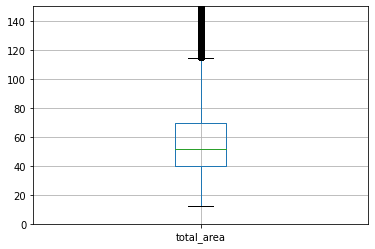

In [37]:
#построю диаграмму размаха для total_area
plt.ylim(0, 150)
df.boxplot('total_area');

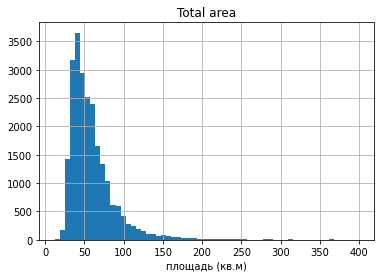

In [38]:
#построю гистограмму для total_area
df['total_area'].hist(bins= 60, range=(12, 400))
plt.title('Total area')
plt.xlabel('площадь (кв.м)')
plt.show()

- Площадь квартир варьируется от 12 до 900 кв.м
- Средняя - 60
- Медиана - 52
- Квартиры свыше 300 кв. м. приму за аномалии и уберу

In [39]:
#изучу данные из столбца last_price
df['last_price'].describe()

count     23699.000000
mean       6541.532723
std       10887.008378
min          12.000000
25%        3400.000000
50%        4650.000000
75%        6800.000000
max      763000.000000
Name: last_price, dtype: float64

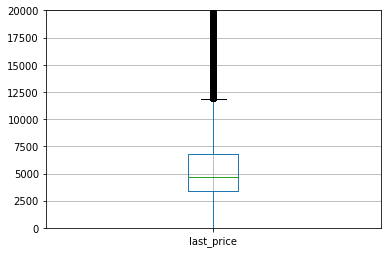

In [40]:
#построю диаграмму размаха для last_price
plt.ylim(0, 20000)
df.boxplot('last_price');

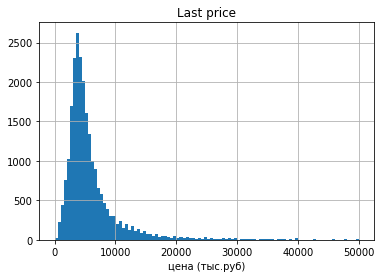

In [41]:
#построю гистограмму для last_price
df['last_price'].hist(bins=100, range=(12, 50000))
plt.title('Last price')
plt.xlabel('цена (тыс.руб)')
plt.show()

- Цены варьируются от 12000 до 763 млн. руб
- Средняя - 6,5 млн
- Медиана - 4,65 млн
- Квартиры стоимостью более 100 млн. руб. уберу

In [42]:
#изучу данные из столбца rooms
df['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

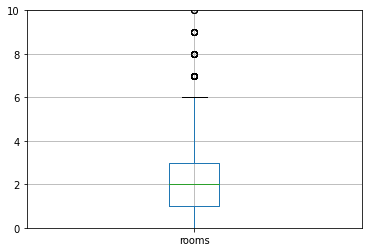

In [43]:
#построю диаграмму размаха для rooms
plt.ylim(0, 10)
df.boxplot('rooms');

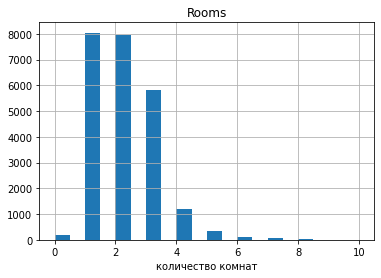

In [44]:
#построю гистограмму для rooms
df['rooms'].hist(bins=20, range=(0, 10))
plt.title('Rooms')
plt.xlabel('количество комнат')
plt.show()

- Комнаты варьируются от 0 до 19
- Среднее - 2
- Медиана - 2
- Квартиры с количеством комнат более 8 уберу

In [45]:
#изучу данные из столбца ceiling_height
df['ceiling_height'].describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

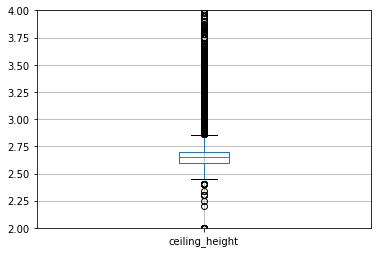

In [46]:
#построю диаграмму размаха для ceiling_height
plt.ylim(2, 4)
df.boxplot('ceiling_height');

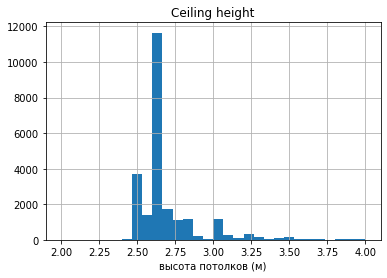

In [47]:
#построю гистограмму для ceiling_height
df['ceiling_height'].hist(bins=30, range=(2, 4))
plt.title('Ceiling height')
plt.xlabel('высота потолков (м)')
plt.show()

- Высота потолков варьируется от 1 до 100 м
- Среднее  - 2,7
- Медиана - 2,65
- Квартиры с потолком менее 2 и более 4 м уберу

In [48]:
#изучу время продажи квартиры
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

- Среднее - 180
- Медиана - 95

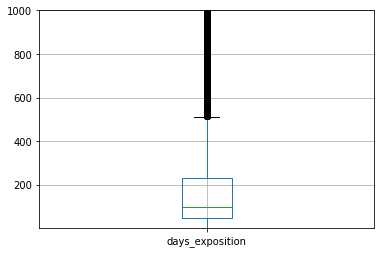

In [49]:
#построю диаграмму размаха для days_exposition
plt.ylim(1, 1000)
df.boxplot('days_exposition');

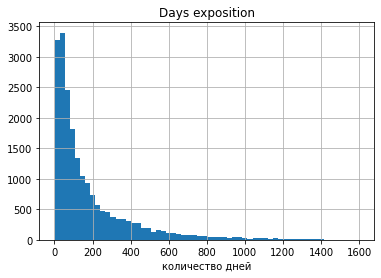

In [50]:
#построю гистограмму для days_exposition
df['days_exposition'].hist(bins=60, range=(1, 1600))
plt.title('Days exposition')
plt.xlabel('количество дней')
plt.show()

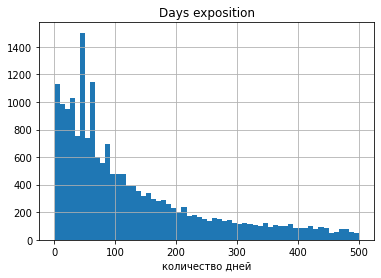

In [51]:
df['days_exposition'].hist(bins=60, range=(1, 500))
plt.title('Days exposition')
plt.xlabel('количество дней')
plt.show()

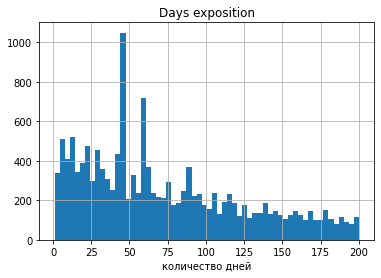

In [52]:
#посмотрю поближе на пики
df['days_exposition'].hist(bins=60, range=(1, 200))
plt.title('Days exposition')
plt.xlabel('количество дней')
plt.show()

Странные пики на 45-ый и 60-ый дни. У Яндекс.Недвижимость есть сроки публикации объявлений в зависимости от стоимости квартир. Это как раз 45, 60 и 90 дней.

Обычно продажа квартиры занимает до 6 месяцев. Необоснованно быстрых продаж я не вижу, к долгим отнесу продажи свыше 1200 дней.

In [53]:
#уберу редкие и выбивающиеся значения
df_new = df.query('total_area<300 and last_price<60000 and rooms<8 and 2<ceiling_height<4')
df_new.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday,month,year,living_area_part,kitchen_area_part
count,23434.000000,23434.000000,23434.000000,23434.000000,23434.000000,23434.000000,23434.000000,23434.000000,23434.000000,23434.000000,...,7912.00000,17946.000000,8940.000000,20313.000000,23434.000000,23434.000000,23434.000000,23434.000000,23434.000000,23434.000000
mean,9.840232,5985.830545,58.751590,2.045191,2.689554,10.715157,33.514479,5.904882,10.267959,0.592857,...,491.80953,0.761005,520.481655,179.812682,97.271358,2.567722,6.398481,2017.369634,0.562637,0.185436
std,5.665078,5072.388999,28.706852,1.013862,0.193979,6.600809,18.529604,4.895995,5.393711,0.959346,...,342.87897,0.931417,277.797368,218.762281,40.074789,1.789849,3.491532,1.037517,0.100887,0.069470
min,0.000000,12.000000,12.000000,0.000000,2.200000,1.000000,2.000000,1.000000,1.300000,0.000000,...,1.00000,0.000000,13.000000,1.000000,0.000000,0.000000,1.000000,2014.000000,0.038462,0.025381
25%,6.000000,3400.000000,40.000000,1.000000,2.600000,5.000000,18.955087,2.000000,7.000000,0.000000,...,288.00000,0.000000,297.750000,45.000000,76.000000,1.000000,3.000000,2017.000000,0.500000,0.137476
50%,9.000000,4600.000000,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,...,455.00000,0.000000,503.500000,95.000000,94.000000,3.000000,6.000000,2017.000000,0.556802,0.163039
75%,14.000000,6700.000000,69.000000,3.000000,2.700000,16.000000,42.000000,8.000000,11.800000,1.000000,...,613.00000,1.000000,733.000000,229.000000,113.000000,4.000000,10.000000,2018.000000,0.631160,0.224138
max,50.000000,59914.000000,297.500000,7.000000,3.980000,60.000000,211.000000,33.000000,100.700000,5.000000,...,3190.00000,3.000000,1344.000000,1580.000000,848.000000,6.000000,12.000000,2019.000000,1.000000,0.787879


In [54]:
df_new.shape[0] / df.shape[0]

0.9888180935904468

В итоге я убрала 1,2% данных, что вполне допустимо.

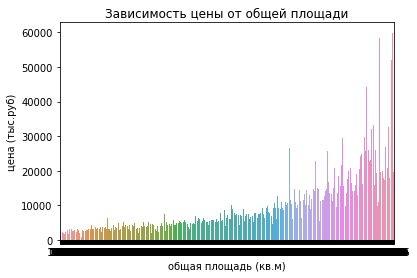

In [55]:
#построю столбчатую диаграмму, чтобы изучить зависимость цены от общей площади
sns.barplot(data=df_new, x='total_area', y='last_price', errwidth=0)
plt.title('Зависимость цены от общей площади')
plt.xlabel('общая площадь (кв.м)')
plt.ylabel('цена (тыс.руб)')
plt.show()

In [56]:
#посчитаю корреляцию
df_new['total_area'].corr(df_new['last_price'])

0.7723918479015474

Видим, что зависимость есть. Коэффициент корреляции равен 0,77. Чем больше общая площадь квартиры, тем выше ее стоимость.

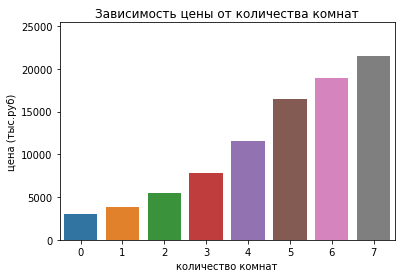

In [57]:
#построю столбчатую диаграмму, чтобы изучить зависимость цены от количества комнат
sns.barplot(data=df_new, x='rooms', y='last_price', errwidth=0)
plt.title('Зависимость цены от количества комнат')
plt.xlabel('количество комнат')
plt.ylabel('цена (тыс.руб)')
plt.show()

In [58]:
#посчитаю корреляцию
df_new['rooms'].corr(df_new['last_price'])

0.4837251653473701

И тут тоже видна зависимость. Хотя коэффициент корреляции ниже и равен 0,48. Все равно можно сказать, чем больше комнат в квартире, тем цена будет выше.

In [ ]:
#построю столбчатую диаграмму, чтобы изучить зависимость цены от удаленности от центра
sns.barplot(data=df_new, x='cityCenters_nearest', y='last_price', errwidth=0)
plt.title('Зависимость цены от удаленности от центра')
plt.xlabel('удаленность от центра (км)')
plt.ylabel('цена (тыс.руб)')
plt.show()

In [ ]:
#посчитаю корреляцию
df_new['cityCenters_nearest'].corr(df_new['last_price'])

Зависимость слабая. Об этом также нам говорит коэффициент корреляции, который равен -0,32. Самые дорогие квартиры действительно находятся ближе к центру, но не всегда.

In [ ]:
#построю столбчатую диаграмму, чтобы изучить зависимость цены от того, на каком этаже расположена квартира
sns.barplot(data=df_new, x='group_floor', y='last_price', errwidth=0)
plt.title('Зависимость цены от того, на каком этаже расположена квартира')
plt.xlabel('этаж')
plt.ylabel('цена (тыс.руб)')
plt.show()

Квартиры на первом этаже самые дешевые. При этом квартиры на посленем этаже чуть дешевле квартир на других этажах.

In [ ]:
#построю столбчатую диаграмму, чтобы изучить зависимость цены от дня недели
sns.barplot(data=df_new, x='weekday', y='last_price', errwidth=0)
plt.title('Зависимость цены от дня недели')
plt.xlabel('день недели')
plt.ylabel('цена (тыс.руб)')
plt.show()

In [ ]:
#посчитаю корреляцию
#df['weekday'].corr(df['last_price'])

In [ ]:
#построю столбчатую диаграмму, чтобы изучить зависимость цены от месяца
sns.barplot(data=df_new, x='month', y='last_price', errwidth=0)
plt.title('Зависимость цены от месяца')
plt.xlabel('месяц')
plt.ylabel('цена (тыс.руб)')
plt.show()

In [ ]:
#посчитаю корреляцию
#df['month'].corr(df['last_price'])

In [ ]:
#построю столбчатую диаграмму, чтобы изучить зависимость цены от года
sns.barplot(data=df_new, x='year', y='last_price', errwidth=0)
plt.title('Зависимость цены от года')
plt.xlabel('год')
plt.ylabel('цена (тыс.руб)')
plt.show()

In [ ]:
#посчитаю корреляцию
#df['year'].corr(df['last_price'])

Зависимости цены от даты размещения объявления я не нашла. По последнему графику можно сказать, что цены на квартиры, размещенные в 2014 году, были чуть выше цен последующих годов. После 2018 года мы снова видим небольшое повешение цен.

In [ ]:
#создам сводную таблицу по населенным пунктам и посчитаю среднюю цену за квадратный метр для каждого locality_name
locality_pivot_table = df_new.pivot_table(index='locality_name', values='last_price', aggfunc=['count', 'mean'])
locality_pivot_table.columns = ['count', 'mean']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False)
locality_pivot_table.head(10)

Из таблицы выше мы видим, что самая высокая стоимсть жилья в Санкт-Петербурге, а самая низкая - в Выборге. 

In [ ]:
#создаю столбец cityCenters_nearest_km
#в отдельной таблице выделю квартиры в Санкт-Петербурге
df_new['cityCenters_nearest_km'] = (df_new['cityCenters_nearest']/1000).round()
df_new['cityCenters_nearest_km'] = df_new['cityCenters_nearest_km'].fillna(0).astype('int')
df_spb = df_new.query('locality_name == "Санкт-Петербург"')
df_spb.head(10)

In [ ]:
#создам сводную таблицу, в которой посчитаю среднюю цену за каждый км
df_spb_pivot = df_spb.pivot_table(index='cityCenters_nearest_km', values='last_price')
df_spb_pivot.head(10)

In [ ]:
#построю график, который покажет, как цена зависит от удалённости от центра
df_spb_pivot['last_price'].plot(kind='bar')
plt.title('Зависимость цены от удаленности от центар')
plt.xlabel('удаленность от центра (км)')
plt.ylabel('цена (тыс.руб)')
plt.show()

По графику видно, как уменьшается цена за квадратный метр с увеличением удаленности от центра. Центральную зону определю в 8 км.

In [ ]:
#выделю квартиры в центре Санкт-Петербурга
df_spb_center = df_spb.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km <= 8')
df_spb_center

In [ ]:
#изучу данные из столбца total_area
df_spb_center['total_area'].describe()

In [ ]:
#построю диаграмму размаха для total_area
plt.ylim(0, 160)
df_spb_center.boxplot('total_area');

In [ ]:
#построю гистограмму для total_area
df_spb_center['total_area'].hist(bins=60, range=(12, 160))
plt.title('Total area')
plt.xlabel('общая площадь (кв.м)')
plt.show()

В центре Питера средняя площадь квартир 50-100 кв.м

In [ ]:
#изучу данные из столбца last_price
df_spb_center['last_price'].describe()

In [ ]:
#построю диаграмму размаха для last_price
plt.ylim(0, 20000)
df_spb_center.boxplot('last_price');

In [ ]:
#построю гистограмму для last_price
df_spb_center['last_price'].hist(bins=60, range=(0, 20000))
plt.title('Last price')
plt.xlabel('цена (тыс.руб)')
plt.show()

Средняя цена квартиры в центре Питера - 5-10 млн. руб

In [ ]:
#изучу данные из столбца rooms
df_spb_center['rooms'].describe()

In [ ]:
#построю диаграмму размаха для rooms
plt.ylim(0, 6)
df_spb_center.boxplot('rooms');

In [ ]:
#построю гистограмму для rooms
df_spb_center['rooms'].hist(bins=20, range=(0, 7))
plt.title('Rooms')
plt.xlabel('количество комнат')
plt.show()

Среднее количество комнат в квартирах в центре Питера - 2-3

In [ ]:
#изучу данные из столбца ceiling_height
df_spb_center['ceiling_height'].describe()

In [ ]:
#построю диаграмму размаха для ceiling_height
plt.ylim(2, 4)
df_spb_center.boxplot('ceiling_height');

In [ ]:
#построю гистограмму для ceiling_height
df_spb_center['ceiling_height'].hist(bins=20, range=(2, 4))
plt.title('Сeiling height')
plt.xlabel('высота потолков (м)')
plt.show()

Средняя высота потолков - 2,65 - 3 м

In [ ]:
#построю столбчатую диаграмму, чтобы изучить зависимость цены от общей площади
sns.barplot(data=df_spb_center, x='total_area', y='last_price', errwidth=0)
plt.title('Зависимость цены от общей площади')
plt.xlabel('общая площадь (кв.м)')
plt.ylabel('цена (тыс.руб)')
plt.show()

In [ ]:
#посчитаю корреляцию
df_spb_center['total_area'].corr(df_spb_center['last_price'])

- Корреляция - 0,71. Диаграмма показывает нам, как с увеличением общей площади, растет и цена на квартиры.
- Выводы схожи с общими выводами по всей базе.

In [ ]:
#построю столбчатую диаграмму, чтобы изучить зависимость цены от количества комнат
sns.barplot(data=df_spb_center, x='rooms', y='last_price', errwidth=0)
plt.title('Зависимость цены от количества комнат')
plt.xlabel('количество комнат')
plt.ylabel('цена (тыс.руб)')
plt.show()

In [ ]:
#посчитаю корреляцию
df_spb_center['rooms'].corr(df_spb_center['last_price'])

- Корреляция - 0,43. Диаграмма показывает нам, как с увеличением количества комнат, растет и цена на квартиры.
- Выводы схожи с общими выводами по всей базе.

In [ ]:
#построю столбчатую диаграмму, чтобы изучить зависимость цены от того, на каком этаже расположена квартира
sns.barplot(data=df_spb_center, x='group_floor', y='last_price', errwidth=0)
plt.title('Зависимость цены от того, на каком этаже расположена квартира')
plt.xlabel('этаж')
plt.ylabel('цена (тыс.руб)')
plt.show()

- Цены на квартиры на первом этаже ниже цен на квартиры на других этажах. Цена квартир на последнем этаже чуть ниже цены квартир на других этажах. Разница незначительна.
- Выводы схожи с общими выводами по всей базе.

In [ ]:
#построю столбчатую диаграмму, чтобы изучить зависимость цены от удаленности от центра
sns.barplot(data=df_spb_center, x='cityCenters_nearest_km', y='last_price', errwidth=0)
plt.title('Зависимость цены от удаленности от центра')
plt.xlabel('удаленность от центра (км)')
plt.ylabel('цена (тыс.руб)')
plt.show()

In [ ]:
#посчитаю корреляцию
df_spb_center['cityCenters_nearest_km'].corr(df_spb_center['last_price'])

- Взаимосвязь очень слабая. Корреляция -0,07 говорит нам об этом. Цены на квартиры в центре Питера +- одинаковые.
- Если в общей выборке мы видили, как цена уменьшается с увеличением расстояния от центра, то здесь такой зависимости нет.

In [ ]:
#построю столбчатую диаграмму, чтобы изучить зависимость цены от дня недели
sns.barplot(data=df_spb_center, x='weekday', y='last_price', errwidth=0)
plt.title('Зависимость цены от дня недели')
plt.xlabel('день недели')
plt.ylabel('цена (тыс.руб)')
plt.show()

In [ ]:
#посчитаю корреляцию
#df_spb_center['weekday'].corr(df_spb_center['last_price'])

In [ ]:
#построю столбчатую диаграмму, чтобы изучить зависимость цены от месяца
sns.barplot(data=df_spb_center, x='month', y='last_price', errwidth=0)
plt.title('Зависимость цены от месяца')
plt.xlabel('месяц')
plt.ylabel('цена (тыс.руб)')
plt.show()

In [ ]:
#посчитаю корреляцию
#df_spb_center['month'].corr(df_spb_center['last_price'])

In [ ]:
#построю столбчатую диаграмму, чтобы изучить зависимость цены от года
sns.barplot(data=df_spb_center, x='year', y='last_price', errwidth=0)
plt.title('Зависимость цены от года')
plt.xlabel('год')
plt.ylabel('цена (тыс.руб)')
plt.show()

In [ ]:
#посчитаю корреляцию
#df_spb_center['year'].corr(df_spb_center['last_price'])

Выводы схожи с общими выводами по всей базе.

## Общий вывод

- Я изучила данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет и выявила несколько факторов, влияющих на конечную рыночную стоимоть квартир.
- Рыночная стоимость выше у квартир:
    - с большей площадью;
    - с большим количеством комнат;
    - расположенных ближе к центру;
    - расположенных на этажах кроме первого и последнего.
- Я не увидела зависимости цены от даты размещения объявления. Единственный момент здесь - цены на квартиры упали после 2014 года и снова пошли вверх после 2018 года.
- Если сравнивать общие данные с данными по квартирам в центре Санкт-Петербурга, большой разницы не вижу. Единственный момент:
    - по общим данным есть зависимость цены от удаленности от центра. Чем ближе к центру, тем выше цена;
    - если брать выборку по центру Питера, такой зависимости нет. Цены +- одинаковые.